## Manual input of Boolean networks

Boolean networks can be specified directly using the `colomoto.minibn.BooleanNetwork` class. It consists of a dictionnary mapping variable names to their local function expressed as logical formula. Negation symbol is `!`, conjunction is `&`, and disjunction is `|`. The module also allows combining logical function with standard Python logic operators. See [colomoto.minibn tutorials](https://nbviewer.jupyter.org/github/colomoto/colomoto-docker/tree/master/tutorials/minibn/) for more information.

In [1]:
from colomoto.minibn import *

The Boolean network from Figure 6.1(a) can be specified as follows:

In [2]:
f = BooleanNetwork({
    "x1": "!x3",
    "x2": "x2 & (x1 | x3)",
    "x3": "!x1"
})
f # display the resulting rules in the notebook

x1 <- !x3
x2 <- x2&(x1|x3)
x3 <- !x1

The method `influence_graph()` returns a quick approximation influence graph of `f` as a [`networkx.MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multigraph.html) Python object. Within Jupyter, the graph is displayed using `dot`. The returned graph is guaranteed to include the actual influence graph of `f`, but may contain spurious influences.

# computing graph layout...


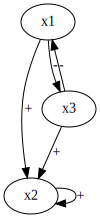

In [3]:
f.influence_graph()

The Boolean network from Figure 6.1 (b) can be specified as follows.

In [4]:
g = BooleanNetwork({
    "x1": "x1 | !x2 | !x3",
    "x2": "x3 & ((x1&!x2) | (!x1&x2))",
    "x3": "!x1 | !x2 | !x3"
})
g

x1 <- x1|!x2|!x3
x2 <- x3&((x1&!x2)|(!x1&x2))
x3 <- !x1|!x2|!x3

# computing graph layout...


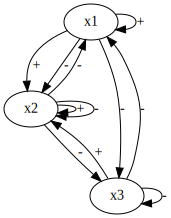

In [5]:
g.influence_graph()

## Input from text files and other formats

Boolean networks are often specified as a text file using the [BoolNet format](http://colomoto.org/biolqm/doc/format-bnet.html) with a `.bnet` extension. Such files can be loaded directly with `minibn`:

In [6]:
!cat i3ffl.bnet

a <- 1
b <- a
c <- !a & c


In [7]:
h = BooleanNetwork("i3ffl.bnet")
list(h) # display variable names

['a', 'b', 'c']

Other usual formats for distributing Boolean networks include GINsim and SBML-qual formats, and many others. The [bioLQM](https://colomoto.github.io/biolqm) library enables the seamless conversion accross a range of usual formats.

In [8]:
import biolqm

First, the file has to be loaded using `biolqm`. It can be a local file, or a URL.

In [9]:
lqm = biolqm.load("http://ginsim.org/sites/default/files/zebra_miR9_22jul2011.zginml")

/home/pauleve/orga/notebooks/updating-modes-notebooks/zebra_miR9_22jul2011.zginml

Then, the model can be converted to `minibn` as follows:

In [10]:
h = biolqm.to_minibn(lqm)
h

Her6 <- !N&!miR9
HuC <- !P&!miR9
N <- HuC
P <- Her6|Zic5
Zic5 <- !N&!miR9
miR9 <- !Her6&!N